In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
dataset = pd.read_csv('model_result/final_prediction.csv')
dataset.set_index('datetime', inplace = True)

In [3]:
dataset['Charge Status'] = 'idle'
dataset['Charge'] = 0
charge = 0

expensive = []
cheap = []

for t in range(0, len(dataset), 24):

    window = dataset['prediction'][t:t+24]

    for index in window.nlargest(3).index:
        expensive.append(index)
        
    for index in window.nsmallest(3).index:
        cheap.append(index)
        

for row in dataset.index:
    
    if row in expensive and charge > 0:
        dataset.loc[row, 'Charge Status'] = 'Discharging'
        charge -= 1
        dataset.loc[row:, 'Charge'] = charge

        
            
    elif row in cheap and charge < 3:
        dataset.loc[row, 'Charge Status'] = 'Charging'
        charge += 1
        dataset.loc[row:, 'Charge'] = charge
        
    else:
        continue





In [4]:
df = pd.get_dummies(dataset)
df.drop(columns = 'Charge Status_idle', inplace = True)

df['Cost'] = df['actual'] * df['Charge Status_Charging'] * 0.005
df['Income'] = df['actual'] * df['Charge Status_Discharging'] * 0.005

In [5]:
print('cost: £' + str(df['Cost'].sum()))
print('income: £' + str(df['Income'].sum()))

cost: £151.01955
income: £280.2293


In [6]:
profit = df['Income'].sum() - df['Cost'].sum()
print('profit: £' + str(profit))

profit: £129.20975


In [7]:
ROI = profit / df['Cost'].sum()
ROI * 100

85.55829361165492

In [8]:
df.head(10)

,actual,prediction,Charge,Charge Status_Charging,Charge Status_Discharging,Cost,Income
datetime,,,,,,,
2018-12-31 00:00:00,60.12,51.188641,0,0,0,0.00000,0.0
2018-12-31 14:00:00,54.00,47.156290,0,0,0,0.00000,0.0
2018-12-31 15:00:00,58.77,50.178570,0,0,0,0.00000,0.0
2018-12-31 16:00:00,79.00,62.983913,0,0,0,0.00000,0.0
2018-12-31 17:00:00,90.00,69.935040,0,0,0,0.00000,0.0
2018-12-31 18:00:00,76.97,61.603915,0,0,0,0.00000,0.0
2018-12-31 19:00:00,53.80,46.921377,0,0,0,0.00000,0.0
2018-12-31 20:00:00,51.80,45.649175,0,0,0,0.00000,0.0
2018-12-31 21:00:00,47.32,42.820497,0,0,0,0.00000,0.0


In [ ]:
ax.annotate('axes fraction', xy=(3, 1), 
            xycoords='data', xytext=(0.8, 0.95), 
            textcoords='axes fraction', 
            arrowprops=dict(facecolor='black', shrink=0.05), 
            horizontalalignment='right', verticalalignment='top')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8574 entries, 2018-12-31 00:00:00 to 2019-12-23 21:00:00
Data columns (total 7 columns):
actual                       8574 non-null float64
prediction                   8574 non-null float64
Charge                       8574 non-null int64
Charge Status_Charging       8574 non-null uint8
Charge Status_Discharging    8574 non-null uint8
Cost                         8574 non-null float64
Income                       8574 non-null float64
dtypes: float64(4), int64(1), uint8(2)
memory usage: 738.7+ KB


In [9]:
from matplotlib.ticker import MaxNLocator



In [155]:
vizualdf = df.iloc[3995:4163]

In [156]:
vizualdf

,actual,prediction,Charge,Charge Status_Charging,Charge Status_Discharging,Cost,Income
datetime,,,,,,,
2019-06-16 02:00:00,36.25,35.226590,0,0,0,0.00000,0.00000
2019-06-16 03:00:00,33.80,33.804751,0,0,0,0.00000,0.00000
2019-06-16 04:00:00,30.00,31.222584,1,1,0,0.15000,0.00000
2019-06-16 05:00:00,31.00,31.874709,2,1,0,0.15500,0.00000
2019-06-16 06:00:00,36.00,35.147800,2,0,0,0.00000,0.00000
2019-06-16 07:00:00,32.00,32.811287,2,0,0,0.00000,0.00000
2019-06-16 08:00:00,36.48,35.867403,2,0,0,0.00000,0.00000
2019-06-16 09:00:00,45.46,41.667376,2,0,0,0.00000,0.00000
2019-06-16 10:00:00,45.98,42.250177,2,0,0,0.00000,0.00000


In [157]:
chargingdatetimes = vizualdf.loc[vizualdf['Charge Status_Charging'] == 1].index
dischargingdatetimes = vizualdf.loc[vizualdf['Charge Status_Discharging'] == 1].index

In [168]:
import matplotlib.patches as mpatches


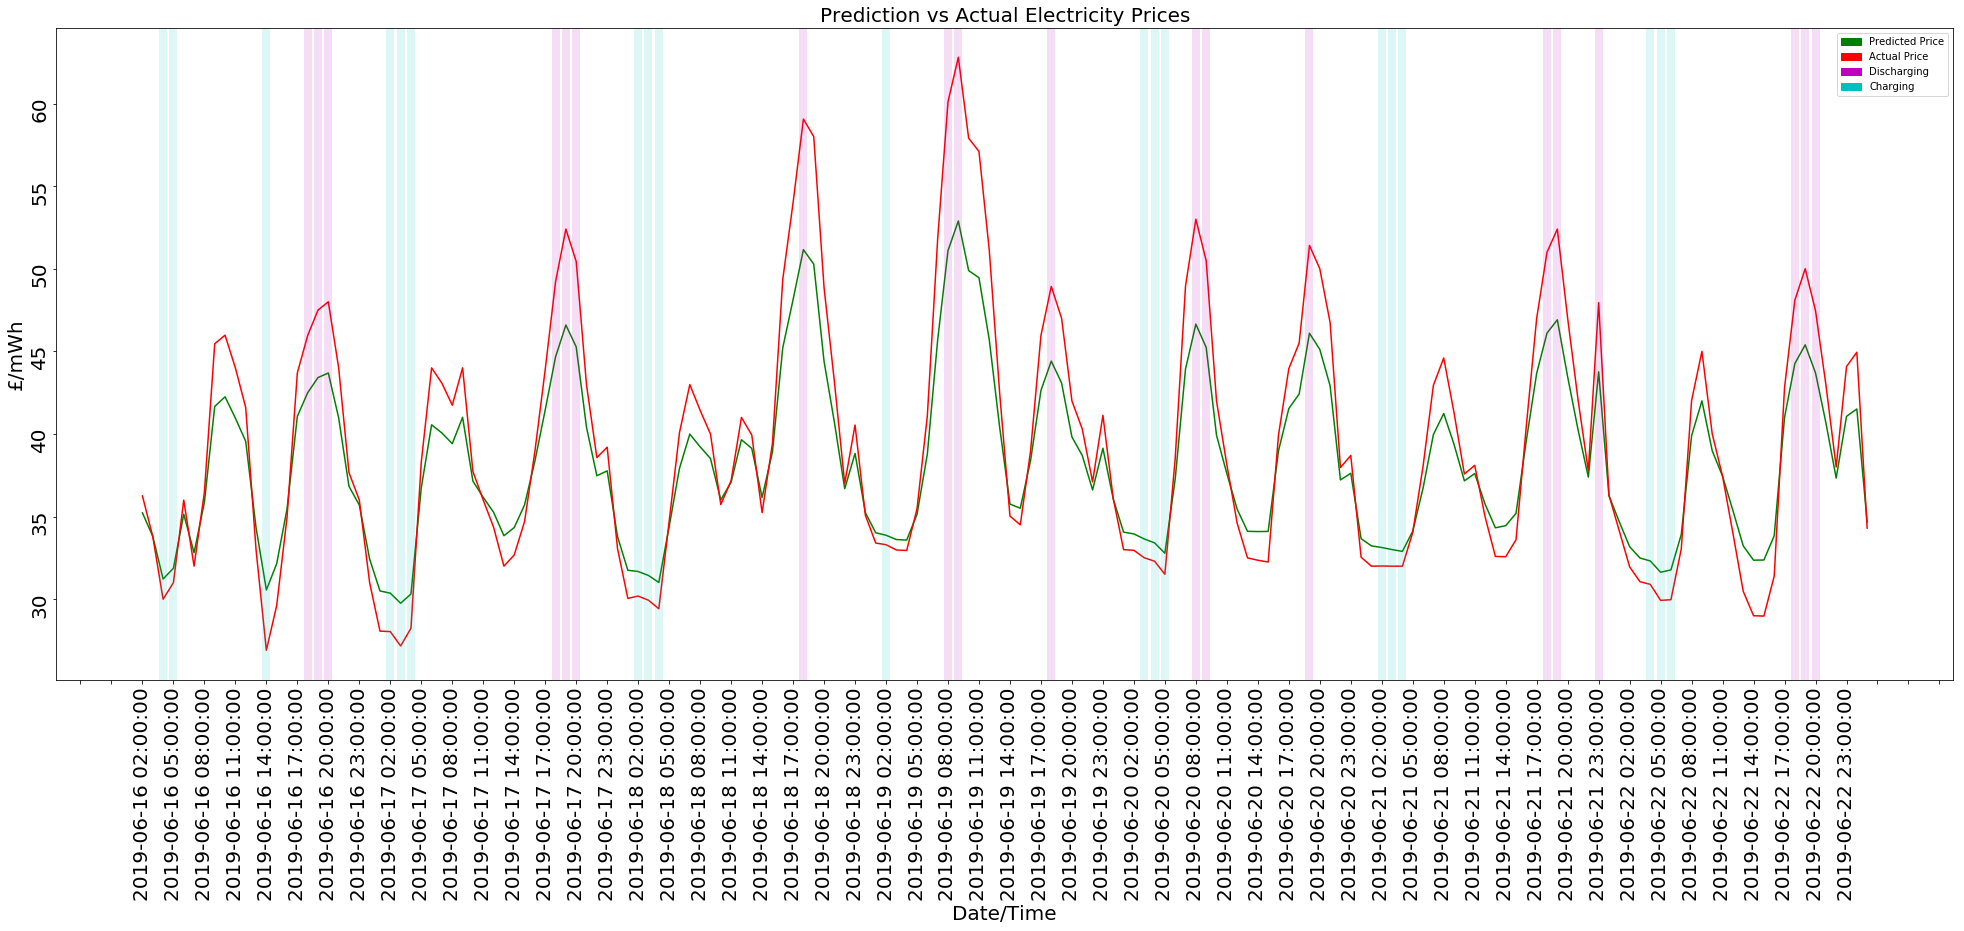

In [175]:
fig, ax = plt.subplots(figsize = (34,12))

ax.set_title('Prediction vs Actual Electricity Prices', fontsize=20)
ax.set_xlabel('Date/Time',fontsize=20)
ax.xaxis.set_major_locator(MaxNLocator(nbins=72))
ax.tick_params(axis='both', which='major', labelsize=20, labelrotation = 90 )
ax.set_ylabel('£/mWh', fontsize=20)
ax.plot(df['prediction'][3995:4163], color = 'g')
ax.plot(df['actual'][3995:4163], color = 'r')

for i in chargingdatetimes:
    
    
    ax.axvline(x=i, linewidth = 8, color = 'c', alpha = 0.1352)
    
for i in dischargingdatetimes:
    
    
    ax.axvline(x=i, linewidth = 8, color = 'm', alpha = 0.1352)
    
    

# ax.legend(loc='center left', prop={'size': 20})

m_patch = mpatches.Patch(color='m', label='Discharging')
cyan_patch = mpatches.Patch(color='c', label='Charging')
green_patch = mpatches.Patch(color='g', label='Predicted Price')
red_patch = mpatches.Patch(color='r', label='Actual Price')

plt.legend(handles=[green_patch, red_patch, m_patch, cyan_patch])


plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))

# t = (df.index)
# s = (df.actual)

# Plot a line and add some simple annotations
line = ax.plot(df.actual)
# ax.annotate('figure pixels',
#             xy=(10, 10), xycoords='figure pixels')
# ax.annotate('figure points',
#             xy=(80, 80), xycoords='figure points')
# ax.annotate('figure fraction',
#             xy=(.025, .975), xycoords='figure fraction',
#             horizontalalignment='left', verticalalignment='top',
#             fontsize=20)
line.show()